# 🤖 Creación de los modelos - Factores de anemia

- Miguel Angel Vélez Suarez
- Samuel Pérez Hurtado

1. Importar los datos preparados
2. División 70-30
3. Transformaciones

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica
import pickle # guardar modelos

# 1. Importar los datos

In [2]:
data = pd.read_csv('data/datos_preparados.csv')
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,Moderate,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,Mild,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,Not anemic,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,Not anemic,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,Moderate,Yes,No,0.000000,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13136 entries, 0 to 13135
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   13136 non-null  object 
 1   Type of place of residence                                             13136 non-null  object 
 2   Wealth index combined                                                  13136 non-null  object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null  float64
 4   Anemia level                                                           13136 non-null  object 
 5   Have mosquito bed net for sleeping (from household questionnaire)      13136 non-null  object 
 6   Smokes cigarettes                                                      13136 non-null 

In [4]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Anemia level"] = labelencoder.fit_transform(data["Anemia level"])
data.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Richest,95.0,1,Yes,No,105.000000,No,No
1,30-34,Urban,Richest,113.0,0,Yes,No,51.335329,No,No
2,35-39,Urban,Richest,121.0,2,Yes,No,0.000000,No,Yes
3,35-39,Urban,Richest,121.0,2,Yes,No,51.335329,No,No
4,20-24,Urban,Richest,108.0,1,Yes,No,0.000000,No,Yes


# 2. División 70-30

<Axes: xlabel='Anemia level'>

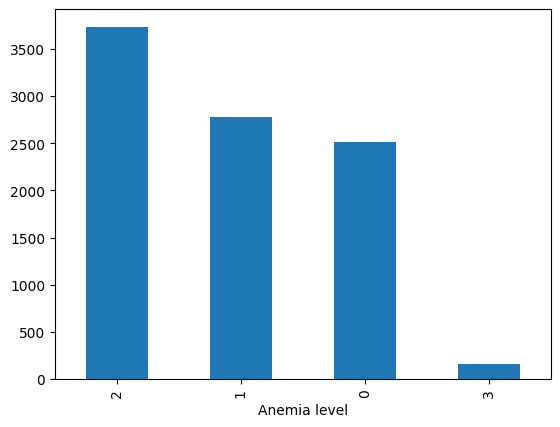

In [5]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Anemia level", axis = 1) # Variables predictoras
Y = data['Anemia level'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

## 2.1. Balanceo del 70%

In [6]:
!pip install imblearn

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9195 entries, 10959 to 6058
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   9195 non-null   object 
 1   Type of place of residence                                             9195 non-null   object 
 2   Wealth index combined                                                  9195 non-null   object 
 3   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  9195 non-null   float64
 4   Have mosquito bed net for sleeping (from household questionnaire)      9195 non-null   object 
 5   Smokes cigarettes                                                      9195 non-null   object 
 6   When child put to breast                                               9195 non-null   flo

In [8]:
from imblearn.over_sampling import SMOTENC

# Identificar las columnas categóricas y numéricas
categorical_cols = ['Age in 5-year groups', 'Type of place of residence', 'Wealth index combined', 
                    'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 
                    'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']
numerical_cols = ['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']

# Crear una lista de booleanos para indicar si una columna es categórica (True) o no (False)
categorical_features = [True if col in categorical_cols else False for col in X_train.columns]

# Usar SMOTENC para balancear las variables categóricas y numéricas
sm = SMOTENC(categorical_features=categorical_features, random_state=42, k_neighbors=2)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

<Axes: xlabel='Anemia level'>

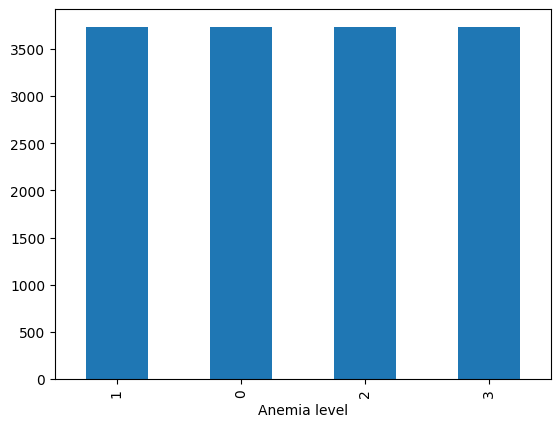

In [9]:
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Anemia level'>

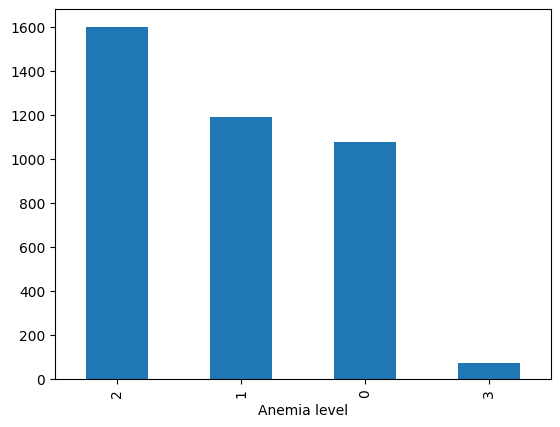

In [14]:
Y_test.value_counts().plot(kind='bar')

In [10]:
# Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])

#Se aplica la normalización al 70% y 30%
X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_train[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']]= min_max_scaler.transform(X_test[['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'When child put to breast']])
X_train.head()

,Age in 5-year groups,Type of place of residence,Wealth index combined,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,When child put to breast,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,35-39,Rural,Poorer,0.635714,Yes,No,0.230203,No,No
1,30-34,Rural,Poorest,0.657143,Yes,No,0.230203,No,No
2,25-29,Rural,Poorest,0.771429,Yes,No,0.466368,No,Yes
3,25-29,Rural,Poorest,0.714286,No,No,0.457399,Yes,No
4,25-29,Rural,Poorer,0.628571,Yes,No,0.230203,No,No


In [11]:
X_train = pd.get_dummies(X_train, drop_first=True, dtype='int64')
X_test = pd.get_dummies(X_test, drop_first=True, dtype='int64')

In [12]:
X_train.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
0,0.635714,0.230203,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
1,0.657143,0.230203,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,0.771429,0.466368,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3,0.714286,0.457399,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,0.628571,0.230203,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [13]:
X_test.head()

,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),When child put to breast,Age in 5-year groups_20-24,Age in 5-year groups_25-29,Age in 5-year groups_30-34,Age in 5-year groups_35-39,Age in 5-year groups_40-44,Age in 5-year groups_45-49,Type of place of residence_Urban,Wealth index combined_Poorer,Wealth index combined_Poorest,Wealth index combined_Richer,Wealth index combined_Richest,Have mosquito bed net for sleeping (from household questionnaire)_Yes,Smokes cigarettes_Yes,Had fever in last two weeks_No,Had fever in last two weeks_Yes,"Taking iron pills, sprinkles or syrup_No","Taking iron pills, sprinkles or syrup_Yes"
5162,0.685714,0.230203,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
7284,0.771429,0.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
8678,0.714286,0.457399,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
304,0.728571,0.269058,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2307,0.914286,0.230203,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
